In [1]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_excel('Folds5x2_pp.xlsx')

In [33]:
data.head(50)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [6]:
x = data.drop(['PE'],axis=1).values
y = data['PE'].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =0)

In [13]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [58]:
reg.predict([[15,50,1060,100]])

array([463.53718226])

In [20]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.9304112159477683

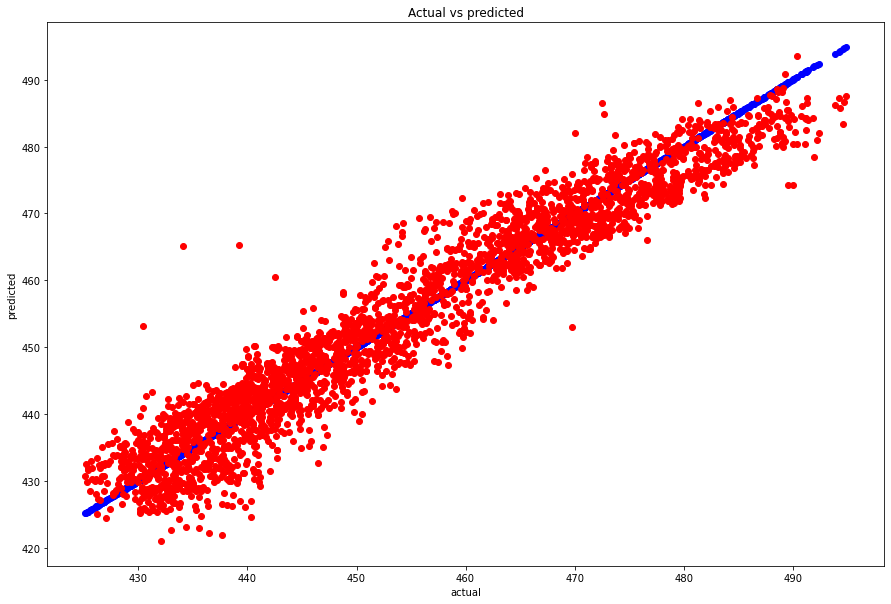

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_test,color='blue')
plt.scatter(y_test,y_pred,color='red')
plt.title('Actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [63]:
predicted_values = pd.DataFrame({'Actual_value': y_test,'Predicted_value': y_pred,'Difference': y_test - y_pred})

In [64]:
predicted_values

,Actual_value,Predicted_value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172
